In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Student_Performance.csv')

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.isnull().mean()

Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df.drop(columns=['Extracurricular Activities'], inplace=True)

In [29]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


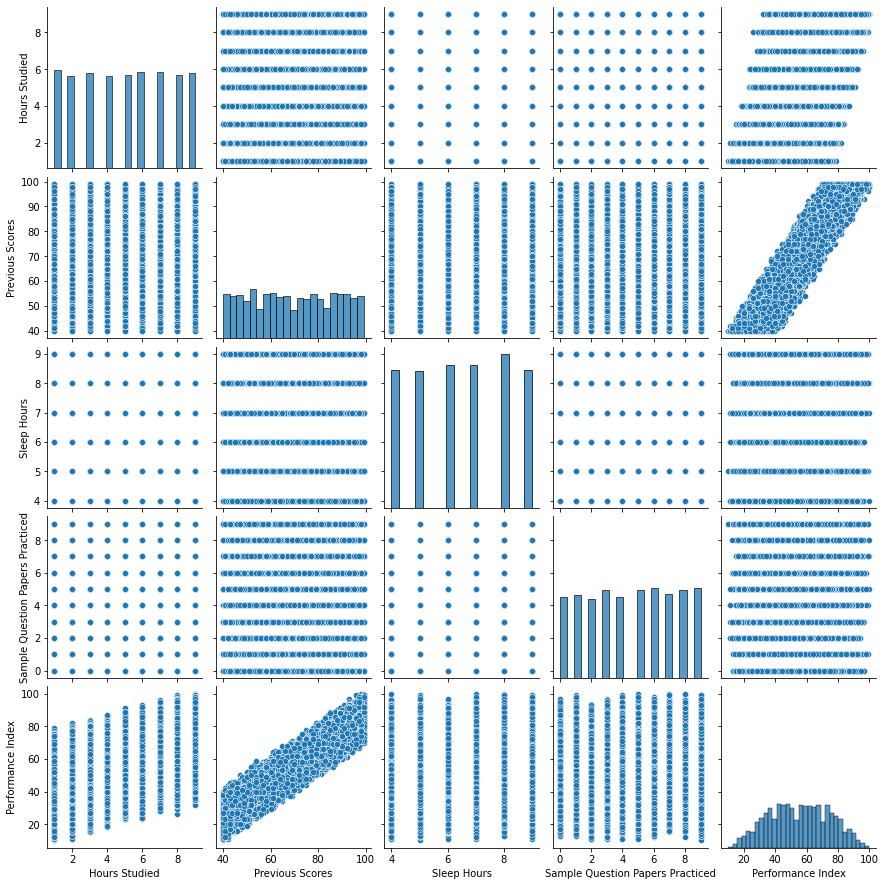

In [30]:
sns.pairplot(df)

In [32]:
df.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


<AxesSubplot:>

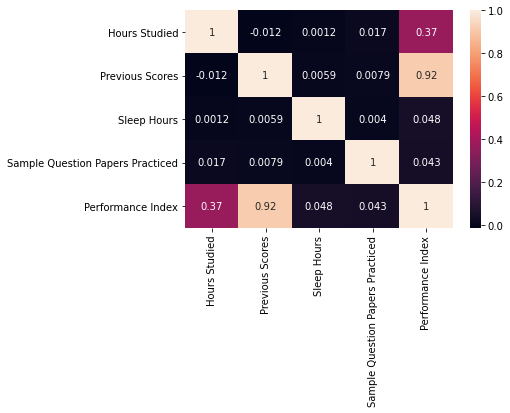

In [35]:
sns.heatmap(df.corr(), annot=True)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Performance Index']), df['Performance Index'], test_size=0.2, random_state=2)

In [37]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.9887873065706716

In [38]:
# RIDGE
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.9887873077090708

In [39]:
# LASSO
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.9887891003947048

In [40]:
# ElasticNet
reg = ElasticNet(alpha=0.005, l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.9887881916673651